# GRAPL: Tutorial 03


Tutorial illustrating the use of the GRAPL library, for representing, analyzing and processing
**acyclic directed mixed graphs** (**ADMG**s) for structural causal modelling.

**License**: CC BY-SA 4.0 2021. 


If you use this code, please cite:

Little, M. A., Badawy, R. (2019). [Causal bootstrapping](https://arxiv.org/pdf/1910.09648.pdf), *ArXiV*, arXiv:1910.09648

In [2]:
import grapl.algorithms as algs
import grapl.dsl as dsl

### Create a GRAPL DSL parser

In [3]:
grapl_obj = dsl.GraplDSL()

### Read a DAG from a `.grapl` file

In [5]:
G = grapl_obj.readgrapl(open('../graphs/front_door.grapl', 'r').read())

### Display the DAG object

#### Text description

In [6]:
G.display()

Title: "Front door adjustment"
Vars: Y,X,M
Parents:
Y <- M
M <- X
Children:
X -> M
M -> Y
Bidirects:
Y <--> X
X <--> Y


#### Graph

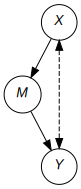

In [7]:
G

### Check if the ADMG is acyclic

In [8]:
G.isayclic() # Expected: True

True

### Compute all ADMG districts

In [9]:
G.districts() # Expected: # [{'M'}, {'X', 'Y'}]

[{'X', 'Y'}, {'M'}]

### Get nterventional (cause-effect) distribution of X on Y

In [10]:
id_str, id_eqn, isident = algs.idfixing(G, {'X'}, {'Y'})

id_eqn # Expected: p_{X}(Y)=\sum_{M,X'}[p(Y|M,X')p(M|X)p(X')]